In [2]:
!pip install tensorflow

In [130]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("raw_data.csv")
df.head()

,School,white,black,hispanic,asian,aian,nhpi,tom,ntr,unk,...,avg_cost_private,faculy_salary,ft_faculty_rate,federal_loan_rate,grad_students,undergrads_non_degree_seeking,booksupply_cost,test_requirements,ten_yrs_after_entry_earnings,completion_rate
0,George C Wallace State Community College-Selma,0.1644,0.7805,0.0058,0.0155,0.0000,0.0000,0.0174,0.0010,0.0155,...,NaN,5915.0,0.5182,0.0000,NaN,495.0,2500.0,NaN,36066.0,0.5845
1,Herzing University-Birmingham,0.3168,0.6000,0.0212,0.0035,0.0053,0.0053,0.0319,0.0000,0.0159,...,26680.0,6076.0,0.5862,0.7739,15.0,6.0,NaN,2.0,27754.0,0.5845
2,Huntingdon College,0.6832,0.1897,0.0497,0.0070,0.0070,0.0000,0.0427,0.0000,0.0209,...,21486.0,6678.0,0.4640,0.7225,NaN,1.0,300.0,1.0,47975.5,0.5845
3,Heritage Christian University,0.8136,0.0508,0.0678,0.0169,0.0000,0.0000,0.0339,0.0169,0.0000,...,9990.0,4774.0,1.0000,0.0392,27.0,NaN,1000.0,1.0,47975.5,0.5845
4,J. F. Drake State Community and Technical College,0.2912,0.5516,0.0447,0.0077,0.0077,0.0015,0.0709,0.0200,0.0046,...,NaN,6418.0,0.4516,0.0000,NaN,140.0,2000.0,NaN,27754.0,0.5845


In [77]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = df.drop(['grad_students','avg_cost_public','avg_cost_private','booksupply_cost','undergrads_non_degree_seeking','sat_mid_math','admissions_rate','sat_mid_reading'], axis=1)
application_df.head()

,School,white,black,hispanic,asian,aian,nhpi,tom,ntr,unk,...,ownership,over_25,sat_mid_overall,region,faculy_salary,ft_faculty_rate,federal_loan_rate,test_requirements,ten_yrs_after_entry_earnings,completion_rate
0,George C Wallace State Community College-Selma,0.1644,0.7805,0.0058,0.0155,0.0000,0.0000,0.0174,0.0010,0.0155,...,1,0.1936,NaN,5,5915.0,0.5182,0.0000,NaN,36066.0,0.5845
1,Herzing University-Birmingham,0.3168,0.6000,0.0212,0.0035,0.0053,0.0053,0.0319,0.0000,0.0159,...,2,0.7513,NaN,5,6076.0,0.5862,0.7739,2.0,27754.0,0.5845
2,Huntingdon College,0.6832,0.1897,0.0497,0.0070,0.0070,0.0000,0.0427,0.0000,0.0209,...,2,0.1419,1076.0,5,6678.0,0.4640,0.7225,1.0,47975.5,0.5845
3,Heritage Christian University,0.8136,0.0508,0.0678,0.0169,0.0000,0.0000,0.0339,0.0169,0.0000,...,2,0.6102,NaN,5,4774.0,1.0000,0.0392,1.0,47975.5,0.5845
4,J. F. Drake State Community and Technical College,0.2912,0.5516,0.0447,0.0077,0.0077,0.0015,0.0709,0.0200,0.0046,...,1,0.4563,NaN,5,6418.0,0.4516,0.0000,NaN,27754.0,0.5845


In [78]:
application_df.dropna()

,School,white,black,hispanic,asian,aian,nhpi,tom,ntr,unk,...,ownership,over_25,sat_mid_overall,region,faculy_salary,ft_faculty_rate,federal_loan_rate,test_requirements,ten_yrs_after_entry_earnings,completion_rate
2,Huntingdon College,0.6832,0.1897,0.0497,0.0070,0.0070,0.0000,0.0427,0.0000,0.0209,...,2,0.1419,1076.0,5,6678.0,0.4640,0.7225,1.0,47975.5,0.5845
6,Jacksonville State University,0.6966,0.2047,0.0059,0.0068,0.0034,0.0004,0.0000,0.0187,0.0635,...,1,0.1376,1084.0,5,7269.0,0.6903,0.6100,1.0,47975.5,0.5845
10,University of West Alabama,0.4528,0.4076,0.0157,0.0031,0.0049,0.0004,0.0228,0.0403,0.0523,...,1,0.2675,1041.0,5,6481.0,0.4659,0.6007,1.0,47975.5,0.5845
12,Marion Military Institute,0.6330,0.2044,0.0739,0.0320,0.0099,0.0074,0.0394,0.0000,0.0000,...,1,0.0024,1147.0,5,6488.0,0.8077,0.4365,1.0,36066.0,0.5845
14,University of Mobile,0.6753,0.1644,0.0126,0.0193,0.0193,0.0042,0.0252,0.0352,0.0445,...,2,0.1023,1166.0,5,5192.0,1.0000,0.5304,1.0,47975.5,0.5845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,Beckfield College-Florence,0.8099,0.1521,0.0042,0.0099,0.0014,0.0028,0.0155,0.0000,0.0042,...,3,0.6155,1050.0,5,5023.0,1.0000,0.8967,5.0,36066.0,0.5845
3384,New College of Florida,0.6895,0.0299,0.1795,0.0342,0.0000,0.0000,0.0385,0.0214,0.0071,...,1,0.0299,1286.0,5,8541.0,0.8750,0.3181,1.0,47975.5,0.5845
3442,California State University-San Marcos,0.2620,0.0305,0.4675,0.0939,0.0027,0.0022,0.0526,0.0455,0.0432,...,1,0.2049,1043.0,8,10090.0,0.4717,0.3330,1.0,47975.5,0.5845
3532,University of Washington-Bothell Campus,0.3507,0.0720,0.1009,0.3102,0.0039,0.0047,0.0626,0.0805,0.0144,...,1,0.1761,1147.0,8,11241.0,0.6391,0.2677,1.0,47975.5,0.5845


In [182]:
# Split our preprocessed data into our features and target arrays
X = df2
y = labels

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [174]:
# # Create a StandardScaler instances
scaler = StandardScaler()

# # Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# # Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [183]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 4         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Compile the model
 nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [185]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
24/24 [==============================] - 1s 2ms/step - loss: -45.4926 - accuracy: 0.0000e+00
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: -48.0524 - accuracy: 0.0000e+00
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: -50.7066 - accuracy: 0.0000e+00
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: -53.5197 - accuracy: 0.0000e+00
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: -56.4586 - accuracy: 0.0000e+00
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: -59.5767 - accuracy: 0.0000e+00
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: -62.8676 - accuracy: 0.0000e+00
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: -66.3043 - accuracy: 0.0000e+00
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: -69.9344 - accuracy: 0.0000e+00
Epoch 10/10
24/24 [==============================] - 0s 3ms/step

In [186]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: -8.2068e+01 - accuracy: 0.0000e+00
Loss: -82.068359375, Accuracy: 0.0


In [131]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [166]:
# df=df.drop(['grad_students','avg_cost_public','avg_cost_private','booksupply_cost','undergrads_non_degree_seeking','sat_mid_math','admissions_rate','sat_mid_reading'], axis=1)
df=df[['School','white','black','hispanic','asian','nhpi','tom','ntr','unk','men','women','ownership','highest_degree']]
df = df.replace({'ownership': 3, 'ownership': 2}, 0)
df.dropna(inplace = True)
labels = df['highest_degree']
labels2 = df['ownership']
df2=df.drop(['ownership','highest_degree','School'], axis=1)

df2.describe()

,white,black,hispanic,asian,nhpi,tom,ntr,unk,men,women
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.571551,0.134721,0.118865,0.047852,0.002464,0.038781,0.042262,0.036736,0.429133,0.570867
std,0.218692,0.175433,0.125260,0.065295,0.009311,0.027624,0.050456,0.058461,0.122504,0.122504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.457700,0.043000,0.046400,0.011000,0.000400,0.025500,0.012100,0.009400,0.375900,0.516800
50%,0.620400,0.079000,0.077600,0.023300,0.001000,0.035200,0.026000,0.022700,0.431300,0.568700
75%,0.739200,0.149200,0.134300,0.051500,0.002200,0.047200,0.053400,0.043900,0.483200,0.624100
max,0.932200,0.979500,1.000000,0.384100,0.242600,0.342000,0.505700,0.839300,1.000000,1.000000


In [107]:
# # Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [108]:
tsne = TSNE(learning_rate=35)

In [109]:
tsne_features = tsne.fit_transform(X_scaled)

In [110]:
# The dataset has 2 columns
tsne_features.shape

(1005, 2)

In [111]:
# Prepare to plot the dataset

# The first column of transformed features
df2['x'] = tsne_features[:,0]

# The second column of transformed features
df2['y'] = tsne_features[:,1]

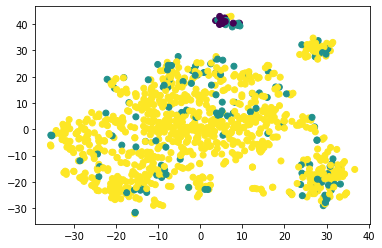

In [113]:
# Visualize the clusters with color
plt.scatter(df2['x'], df2['y'], c=labels)
plt.show()

In [152]:
pca = PCA(n_components=8)
principal_components = pca.fit_transform(df2)
principal_components.shape

(1005, 8)

In [153]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

0.13532700326931835

In [154]:
# Reduce dimensions with t-SNE
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

(1005, 2)

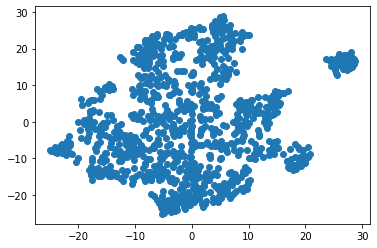

In [155]:
# Plot t-SNE output
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [156]:
# Identify clusters with k-means
inertia = []
k = list(range(1,20))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

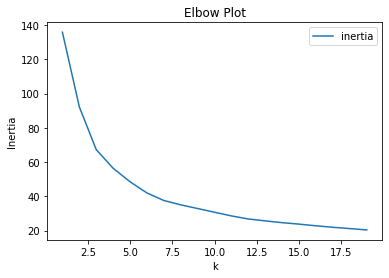

In [157]:
# Create an elbow plot
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [158]:
X = df2
y = labels

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8333333333333334


[0.08274313 0.09939934 0.08991248 0.12345011 0.08299407 0.09305166
 0.1163671  0.09870571 0.10529595 0.10808045]


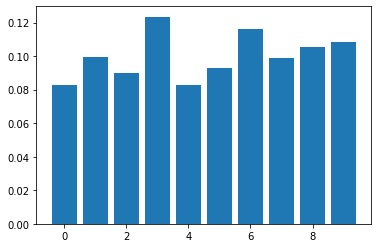

In [161]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [162]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False, False, False,  True, False, False,  True, False,  True,
        True])

In [163]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [164]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8565737051792829
Testing Score: 0.8293650793650794


In [165]:
df2.columns

Index(['white', 'black', 'hispanic', 'asian', 'nhpi', 'tom', 'ntr', 'unk',
       'men', 'women'],
      dtype='object')